# Chapter 9 exercise

The background setup was given. We just need to change the function `f`.
The $x$ and $y$ ranges are the same.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# This is the RHS of the equation
f = lambda x,y: -5*np.sin(3*np.pi*x)*np.cos(2*np.pi*y)

# set up the grid
n=30;
x = np.linspace(0,1,n)
y = np.linspace(0,1,n);

# Useful to store f(x,y) in an array and use F(i,j) instead of f(x(i),y(k))
X,Y = np.meshgrid(x,y)
F=f(X,Y);

# determine grid size
h =x[1]-x[0]

# the solution grid is padded with fictitious nodes to remove at the end
U = np.zeros((n+2,n+2))

# we need to pad F as well, so that the two grids are not mismatched
F=np.pad(F,1, mode='constant')

Then, when we perform the update steps we ensure that the boundary conditions are enforced on the fictitious nodes:

In [2]:
nsweep = 300 #number of sweeps
r=1          #relaxation parameter (can be changed)
n,m = np.shape(U)

for k in range(nsweep-1):
  #enforce boundary conditions on fictitious nodes
  U[0,:]=U[2,:]; U[-1,:]=U[-3,:]
  U[:,0]=U[:,3]; U[:,-1]=U[:,-3]
  for i in range(1,n-1):
    for j in range(1,m-1):
      Unew = (U[i-1,j]+U[i+1,j]+U[i,j-1]+U[i,j+1])/4-h**2/4*F[i,j]
      U[i,j] = U[i,j]+r*(Unew-U[i,j])

A plot of `U[1:-1,1:-1]` is shown below. Note that if $\phi_{sol}$ is a solution of this problem, which satisfies the boundary conditions, then $\phi_{sol}+C$ is also a solution. Hence, it is possible for the surface to appear shifted up or down in your answers.

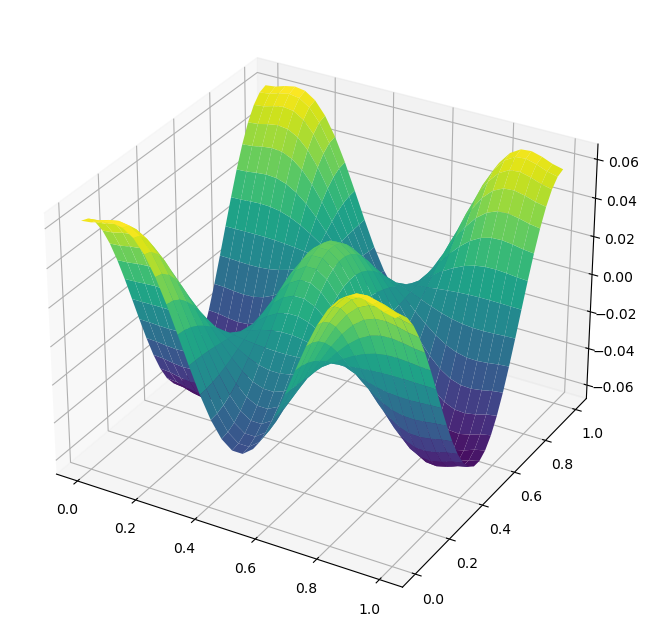

In [3]:
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,U[1:-1,1:-1],cmap='viridis')
plt.show()

To further test your understanding, you may wish to try modifying this code so that Neumann conditions on the left and right boundaries are replaced by Dirichlet conditions:

\begin{equation*}
u(0,y)=0, \quad u(1,y)=0, \quad u_y(x,0)=0, \quad u_y(x,1)=0.
\end{equation*}

The exact solution to the problem with these conditions is

\begin{equation*}
U=\frac{5}{13\pi^2}\sin(3\pi x)\cos(2\pi y),
\end{equation*}

which will allow you to check your answer.